In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline

In [2]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf');

font = matplotlib.font_manager.FontProperties(fname='/System/Library/Fonts/Supplemental/Avenir.ttf')

In [3]:
plt.rcParams.update({'text.usetex': True,
                        'font.family': "sans-serif",
                        'text.latex.preamble': r"\usepackage{amsmath}"})

In [90]:
# reading processed SNPs data:

what = 'syn'
species = 'MGYG-HGUT-02492'

# lambda_2 as a function of coordinate distance ell
ell_scan = {} # [x, y]
for i in range(6):
    ell_scan[i] = []
    ell_scan[i].append(np.load('../uhgg/' + what + '/' + species + '/ell_scan_ells_' + str(i) + '.npy'))
    ell_scan[i].append(np.load('../uhgg/' + what + '/' + species + '/ell_scan_stats_' + str(i) + '.npy'))

# lambda_2 as a function of allele frequency scale f0
f0_scan = {} # [x, y]
for i in range(3):
    f0_scan[i] = []
    f0_scan[i].append(np.load('../uhgg/' + what + '/' + species + '/f_scan_f0s_' + str(i) + '.npy'))
    f0_scan[i].append(np.load('../uhgg/' + what + '/' + species + '/f_scan_stats_' + str(i) + '.npy'))

# distributions
nrf2_large_f0 = np.load('../uhgg/' + what + '/' + species + '/LEs_uhgg_big-freq.npy')
nrf2_med_f0 = np.load('../uhgg/' + what + '/' + species + '/LEs_uhgg_med-freq.npy')
nrf2_small_f0 = np.load('../uhgg/' + what + '/' + species + '/LEs_uhgg_small-freq.npy')

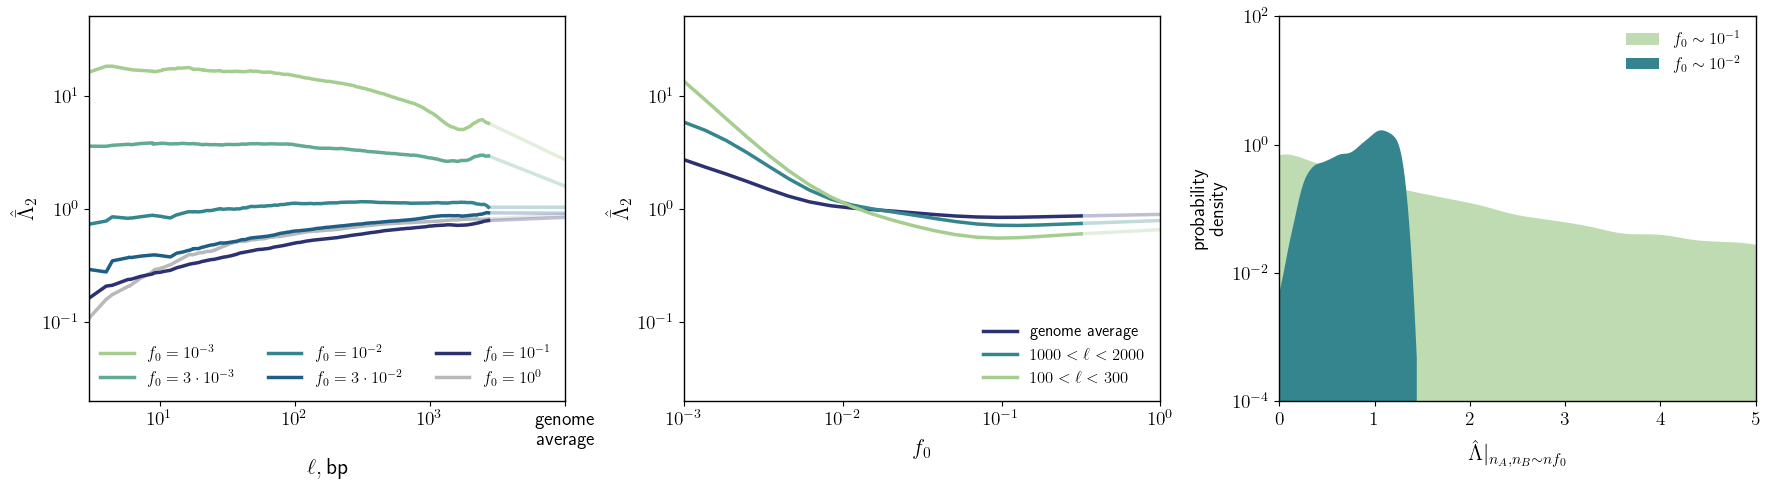

In [110]:
# make sure that the notation is consistent w/ that in the text

matplotlib.rcParams['axes.linewidth'] = 1

fig = plt.figure(figsize=(21.5, 5))

grid = gridspec.GridSpec(ncols=3, nrows=1,
                         width_ratios=[1, 1, 1], wspace=0.25,
                         height_ratios=[1], hspace=0.1)

grey = '#b9b9b9' 
dark_grey = '#696969'
w = 1.25 # linewidth

for c in range(3):
    
    plt.subplot(grid[c // 3, c % 3])
    
    # left panel: lambda_2 as a function of ell
    if c == 0: 
        
        cmap = matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=1, vmax=5),cmap=sns.color_palette("crest_r", as_cmap=True))
        labels = {0: '$f_0=10^{0}$', 1: '$f_0=10^{-1}$', 2: '$f_0=3 \cdot 10^{-2}$', 3: '$f_0=10^{-2}$', 4: '$f_0=3 \cdot 10^{-3}$', 5: '$f_0=10^{-3}$'} 
        
        for i in reversed(range(6)):
            
            if i == 0:
                color=grey
                z=-1
            else:
                color=matplotlib.colors.rgb2hex(cmap.to_rgba(i))
                z=1
            
            plt.loglog(ell_scan[i][0][:-1], ell_scan[i][1][:-1], color=color, linewidth=2*w, label=labels[i], zorder=z)
            plt.loglog([ell_scan[i][0][-2], 1e4], ell_scan[i][1][-2:], color=color, alpha=0.3, linewidth=2*w, zorder=z)

        plt.xticks([1e1, 1e2, 1e3, 1e4], 
                   ['$10^{1}$', '$10^{2}$', '$10^{3}$', r"$\text{genome}$" + '\n' + r"$\text{average}$"])
        plt.yticks([1e-1, 1e0, 1e1], 
                   ['$10^{-1}$', '$10^{0}$', '$10^{1}$'])
        plt.ylim([2e-2, 5e1])
        plt.xlim([3, 1e4])

        plt.minorticks_off()
        plt.tick_params(axis='both', labelsize=14)
        
        plt.ylabel(r"$\hat{\bar{\Lambda}}_2$", fontsize=16, labelpad=4)
        plt.xlabel(r"$\ell, \text{bp}$", fontsize=16, labelpad=8)   
        
        plt.legend(frameon=False, fontsize=12, loc='lower right', labelspacing=0.5, ncol=3);
    
    elif c == 1:
        
        cmap = matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=0, vmax=2),cmap=sns.color_palette("crest_r", as_cmap=True))
        labels = {0: r"$\text{genome average}$", 1: r"$1000 < \ell < 2000$", 2: r"$100 < \ell < 300$"} 
        
        for i in range(3):
            color=matplotlib.colors.rgb2hex(cmap.to_rgba(i))
            plt.loglog(f0_scan[i][0][:-1], f0_scan[i][1][:-1], color=color, linewidth=2*w, label=labels[i])
            plt.loglog([f0_scan[i][0][-2], 1], f0_scan[i][1][-2:], color=color, alpha=0.3, linewidth=2*w)
        
        plt.xticks([1e-3, 1e-2, 1e-1, 1e0], 
                   ['$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'])
        plt.yticks([1e-1, 1e0, 1e1], 
                   ['$10^{-1}$', '$10^{0}$', '$10^{1}$'])
        plt.ylim([2e-2, 5e1])
        plt.xlim([0.001, 1])

        plt.minorticks_off()
        plt.tick_params(axis='both', labelsize=14)
        
        plt.ylabel(r"$\hat{\bar{\Lambda}}_2$", fontsize=16, labelpad=4)
        plt.xlabel(r"$f_0$", fontsize=16, labelpad=8) 
        
        plt.legend(frameon=False, fontsize=12, loc='lower right', labelspacing=0.5);
    
    elif c == 2:
        
        cmap = matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=0, vmax=2),cmap=sns.color_palette("crest_r", as_cmap=True))
        
        sns.kdeplot(nrf2_med_f0, bw_adjust=1, fill=True, alpha=0.7, linewidth=0, 
                    color=matplotlib.colors.rgb2hex(cmap.to_rgba(2)), label=r"$f_0 \sim 10^{-1}$")
        sns.kdeplot(nrf2_large_f0, bw_adjust=1, fill=True, alpha=1, linewidth=0, 
                    color=matplotlib.colors.rgb2hex(cmap.to_rgba(1)), label=r"$f_0 \sim 10^{-2}$")
        
        plt.yscale('log')
        plt.minorticks_off()
        plt.tick_params(axis='both', labelsize=14)

        plt.xlim(0, 5)
        plt.ylim(1e-4, 1e2)

        plt.yticks([1e-4, 1e-2, 1e0, 1e2], ['$10^{-4}$', '$10^{-2}$', '$10^{0}$', '$10^{2}$'])
        plt.xticks([0, 1, 2, 3, 4, 5], ['$0$', '$1$', '$2$', '$3$', '$4$', '$5$'])
        
        plt.ylabel(r"$\text{probability}$" + '\n' + r"$\text{density}$", fontsize=14, labelpad=4);
        plt.xlabel(r"$\hat{\Lambda}\vert_{n_A, n_B \sim nf_0}$", fontsize=16, labelpad=8); 
        
        plt.legend(frameon=False, fontsize=12, loc='upper right', labelspacing=0.5);

#plt.savefig('fig9_v1.png',dpi=600,bbox_inches='tight') 